# Loan Prediction

Loan prediction is a very common real-life problem  that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man-hours reducing the bank's expenses significantly.  

**Problem Statement:** 

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi-urban and rural areas. Customers first apply for home loan after which the company validates the customer's elligibility for loan. The company wants to automate the loan elligibility process(real time) based on customer detail provided while filling an online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit history and others. To automate this processm they have given a problem to identify the customers segments, those are elligible for loan amount so that they can specifically target customers.

**Approach:** This is a classification problem where we have to predict whether a loan would be approved or not. 

**Hypothesis Generation:**

This is an important stage in the data science/machine learning pipeline as it involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement throroughly before even looking at the data.

The following are some of the factors that can affect Loan Approval:
1. Salary: The applicants with higher income should have higher chances of loan approval.
2. Previous History: Applicants who have repayed their previous debts should have higher chances of loan approval.
3. Loan amount: The loan approval should depend on the loan amount. if the loan amount is less, the chances of approval should be high because it is low risk.
4. Loan term: Loan for less time period and less amount should have higher chances of approval as it is low risk.
5. EMI: The lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

The next step is to validate the above hypotheses using the dataset.

In [1]:
#importing the neccessary dependecies
import pandas as pd
import numpy as np  # for mathematical computation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings      #to ignore warnings
warnings.filterwarnings("ignore")
 

In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

**Loading the Datset**

In [2]:
#loading the dataset
train = pd.read_csv('Datasets/train_ctrUa4K.csv')
test = pd.read_csv('Datasets/test_lAUu6dG.csv')

#making copy of the files such that if we make any changes in these datsets we'll still retain the original datsets
train_original = train.copy()
test_original = test.copy()

**Understanding the data**

In [3]:
# checking the features in the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

There are 12 independent variables and 1 target variable. i.e. Loan status. Ther are similar features in both the train and test datasets. The loan status will be predcited using the model built with the training data.

1. Loan_ID	:Unique Loan ID
2. Gender	: Male/ Female
3. Married	:Applicant married (Y/N)
4. Dependents	:Number of dependents
5. Education	:Applicant Education (Graduate/ Under Graduate)
6. Self_Employed	:Self employed (Y/N)
7. ApplicantIncome	:Applicant income
8. CoapplicantIncome	:Coapplicant income
9. LoanAmount	:Loan amount in thousands
10. Loan_Amount_Term	:Term of loan in months
11. Credit_History	:credit history meets guidelines
12. Property_Area	:Urban/ Semi Urban/ Rural
13. Loan_Status	:(Target) Loan approved (Y/N)

In [5]:
#checking the datatypes
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Object: These are categorical variables, int64: are integer variables and float64: represents variables with some decimal values invovlved. 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Shows there are some null values in some of the features.

In [8]:
print('Training dataset: {}',train.shape)
print('Testing dataset: {}',test.shape)

Training dataset: {} (614, 13)
Testing dataset: {} (367, 12)


## Exploratory Data Analysis(EDA)
**Univariate Analysis**

This is the simplest form of analyzing data where each variable is examined individually. For categorical featyres, frequency tables and bar plots are used to calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable. 

Starting with the target variables; the loan status.

In [9]:
#getting a frequency tables
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
# use normalize to print out propotions instead of a number
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

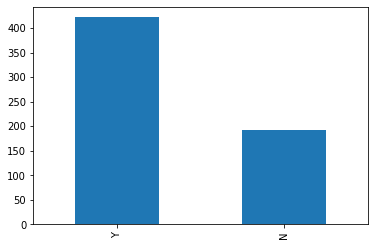

In [11]:
#plotting the distribution
train['Loan_Status'].value_counts().plot.bar()

The above analysis shows that the loans of 422 out of 614 people were approved. This is a about 69% approval.

We can then visualize the other variables separately.

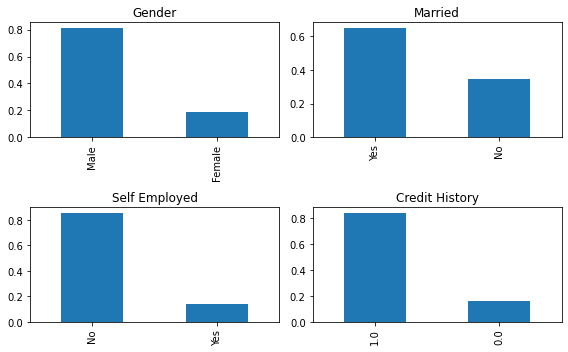

In [12]:
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender',figsize = (8,5))
plt.subplot(2,2,2)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')


plt.tight_layout()

From the above bar plots, we can infer that:
1. 80% of the applicants in the dataset are male.
2. Around 65% of the applicants are married
3. Around 15% of the applicants are self_employed
4. Around 85% of the applicants have repaid their debts.

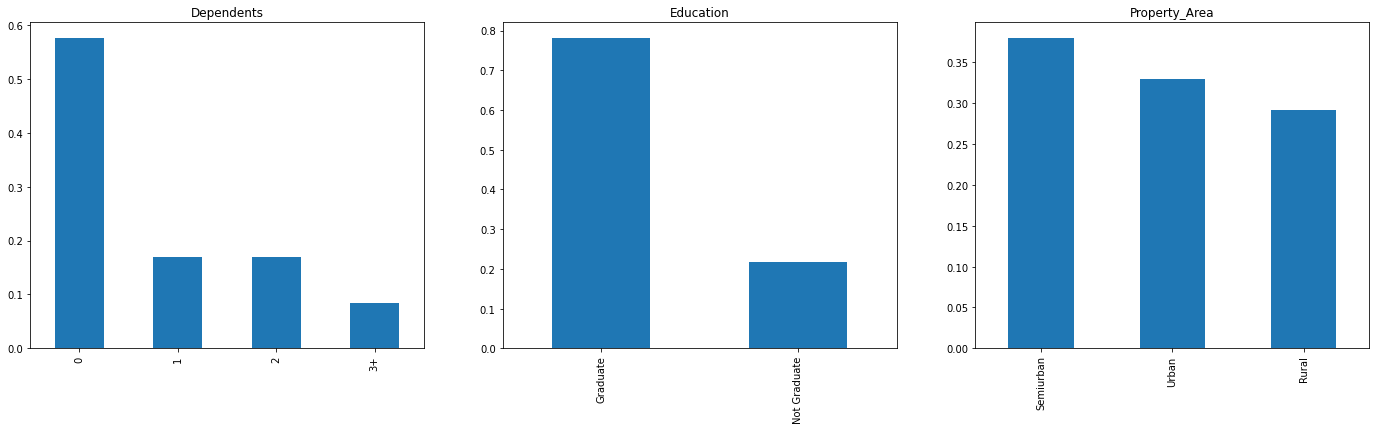

In [13]:
# analyzing the ordinal variables: that have some order involved e.g Education
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (24,6),title='Property_Area')

#plt.tight_layout()
plt.show()

The following inferences can be made from the above bar plots:
1. Most of the applicants don't have any dependents
2. Around 80% of the applicants are graduates
3. Most of the applicants are from semi-urban areas

<AxesSubplot:xlabel='ApplicantIncome'>

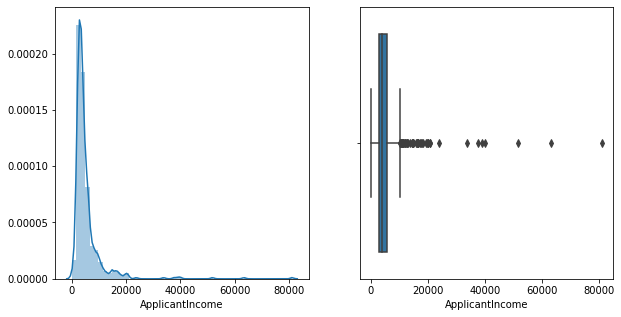

In [14]:
# visualizing the numerical variables
fig, axes = plt.subplots(1,2,figsize = (10,5))
sns.distplot(train['ApplicantIncome'],ax = axes[0])
sns.boxplot(train['ApplicantIncome'],ax = axes[1])

It can be inferred that most of the applicant income is towards the left which means it is not normally distributed. This will need to be normalized in later sections as algorithms work better if the data is  normally distributed.

The box plot confirms the presence of a lot od outliers/extreme values. This can be attributed to the income disparity in the society. This can be due to the fact that we are looking at people with different education levels. Segregating the income levels by education could give a better insight

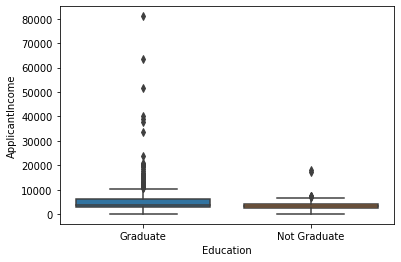

In [15]:
sns.boxplot(x = train['Education'],y = train['ApplicantIncome'])
plt.show()

The above plot shows that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

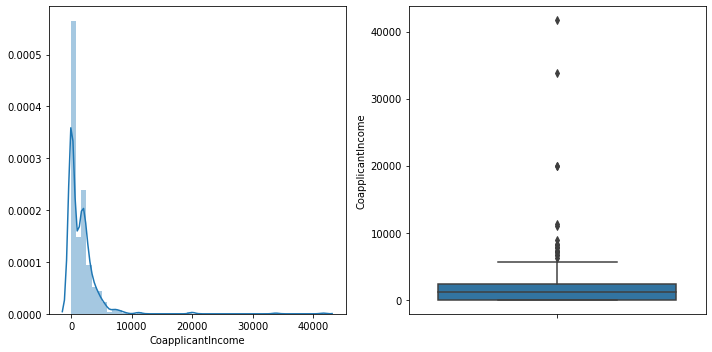

In [16]:
#Analyzing the co-applicant income distribution.
fig, axes = plt.subplots(1,2,figsize = (10,5))
sns.distplot(train['CoapplicantIncome'],ax = axes[0])
sns.boxplot(y = train['CoapplicantIncome'],ax = axes[1],orient = 'v')
plt.tight_layout()
plt.show()

We can see a similar distribution as that of the applicant income. Majority of the coapplicant's income ranges from 0 to 5000. We can also see a lot of outliers and it is not normally distributed.

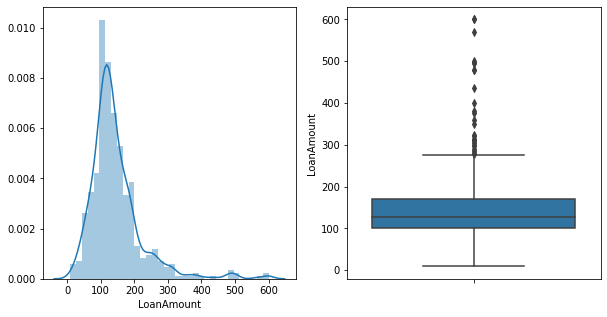

In [17]:
# dropping null values
df = train.dropna()

#loan amount distribution plots
fig, axes = plt.subplots(1,2,figsize = (10,5))
sns.distplot(df['LoanAmount'],ax = axes[0])
sns.boxplot(df['LoanAmount'],ax = axes[1],orient = 'v')
plt.show()

We can observe that there are a lot of outliers in this variable and the distribution is fairly normal. This will be treated later before modelling.


**Bivariate Analysis**

The hypotheses can be tested using bivariate analysis. After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable. 

In [18]:
def bivariate_analysis(var):
    #getting the relationship between the target variable and categorical independent variables
    #crosstab
    category = pd.crosstab(train[var],train['Loan_Status'])

    #stacked bar plot to show propotion of approved and unapproved loans.
    category.div(category.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked=True,figsize = (4,4))
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.show()

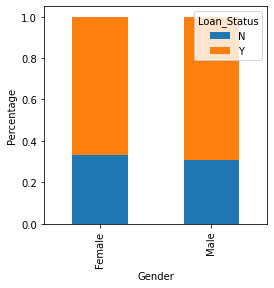

In [19]:
#Gender Analysis
bivariate_analysis('Gender')

It can be inferred from the above plot that the propotion of male and female applicants is more or less same for both approved and unapproved loans.

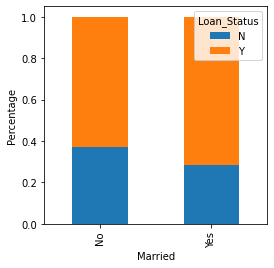

In [20]:
bivariate_analysis('Married')

There is a higher propotion of married applicants approved for loans

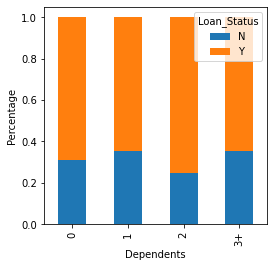

In [21]:
# Dependents Analysis
bivariate_analysis('Dependents')

The distribution of applicants with 1 or 3+ dependents is similar across both categorie of Loan Status.

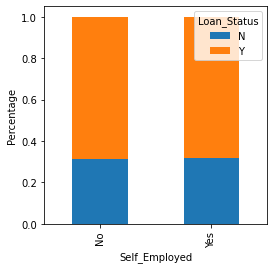

In [22]:
bivariate_analysis('Self_Employed')

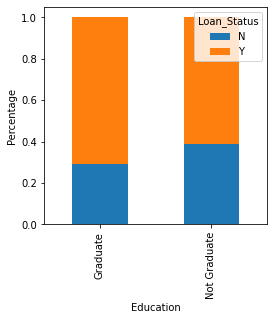

In [23]:
bivariate_analysis('Education')

A higher propotion of graduate applicants are being approved for loans. There is nothing significant we can infer from the self-employed plot

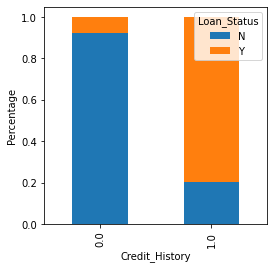

In [24]:
bivariate_analysis('Credit_History')

We can infer that the applicants with a credit history of 1 are more likely to be approved for loans.

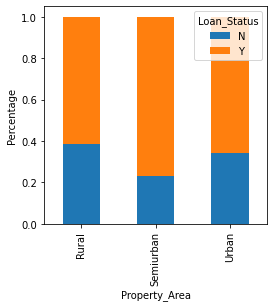

In [25]:
bivariate_analysis('Property_Area')

Propotion of loans being approved for in semi-urban area is higher compared to that in the rural or urban areas.

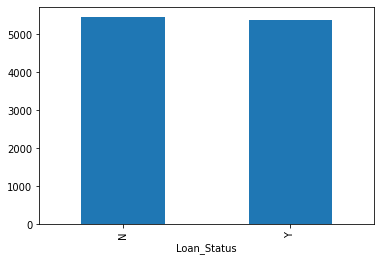

In [26]:
#visualizing numerical independent variables with respect to the target variable
# Getting the mean income of people for which the loan has been approved vs the mean income for which the loan was not approved
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

We do not see any change in the mean income. We can use bins to analyze corresponding loan status for each bin

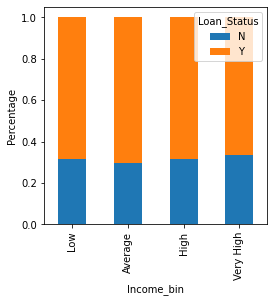

In [27]:
#analyzing applicant income
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']

train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels = group)

bivariate_analysis('Income_bin')

It can be inferred that applicant income does not affect the chances of loan approval which contradicts our hypothesis which we assumed that if the applicant income is high, the chances of a loan approval will also be high.

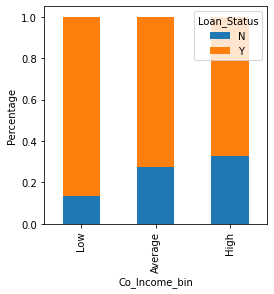

In [28]:
#analyzing co-applicant income
bins = [0,1000,3000,42000]
group = ['Low','Average','High']

train['Co_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)

bivariate_analysis('Co_Income_bin')

The above plot shows that the lower the co-applicants income, the more likely the loan is to be approved, which does not seem right. Possible reasons could be many of the applicants do not have co-applicants therefore the co-applicant income for such applicants ends up being categorized as 0. Threfore, Loan approval is not dependent on it. 

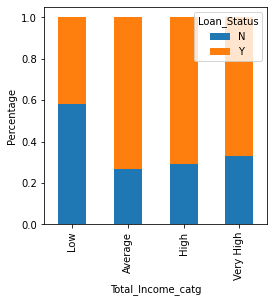

In [29]:
#combining the co-applicant and applicants income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']

#categorizing the total income
train['Total_Income_catg'] = pd.cut(train['Total_Income'],bins,labels = group)


bivariate_analysis('Total_Income_catg')

From the above plot we can see that propotion of loans getting approved for applicants having low Total Income is less compared to the rest.

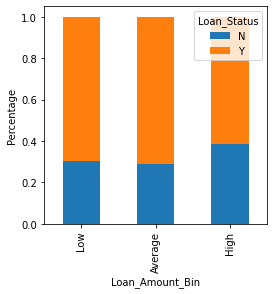

In [30]:
#visualizing the loan amount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['Loan_Amount_Bin'] = pd.cut(train['LoanAmount'],bins,labels = group)

bivariate_analysis('Loan_Amount_Bin')


It can be seen from the above graph that the propotion of loans is higher for Low and Average amount compared to high loan amount.


In [31]:
#getting  a correlation plot
#dropping the bins
train = train.drop(['Income_bin', 'Co_Income_bin', 'Total_Income', 'Total_Income_catg',
        'Loan_Amount_Bin'],axis = 1)

In [32]:
# replacing some of the categories specifics
train['Dependents'].replace('3+',3,inplace = True)
test['Dependents'].replace('3+',3,inplace = True)
train['Loan_Status'].replace('N',0,inplace = True)
train['Loan_Status'].replace('Y',1,inplace = True)

<AxesSubplot:>

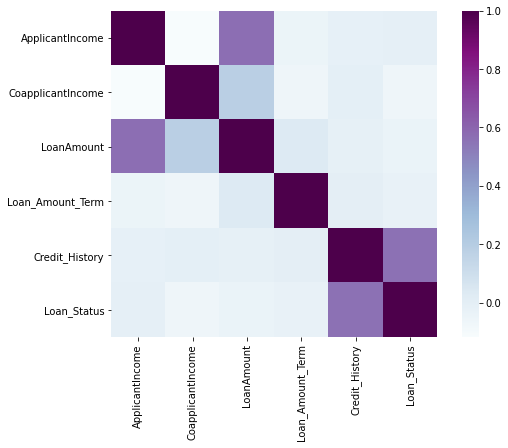

In [33]:
#corelation matrix
corr_matrix = train.corr()
f,ax = plt.subplots(figsize = (9,6))
sns.heatmap(corr_matrix, square = True,cmap = 'BuPu')

From the above heatmap, we see that the most correlated variables are :
1. Applicant Income and Loan Amount
2. Credit History and Loan Status
3. The Loan Amount is also correlated with the CoapplicantIncome.

**Data Cleaning & Preparation**

In [34]:
# dealing with missing values in the data
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in some of the columns. The missing values will be treated one by one:
1. For numerical variables: imputation using mean or median
2. For categorical variables: imputation using mode


In [35]:
# For categorical variables
def categorical_null(var,cond):
    if cond == 'train':
        train[var].fillna(train[var].mode()[0],inplace = True)
    else:
        test[var].fillna(test[var].mode()[0],inplace = True)

In [36]:
#filling null values in categorical variables
columns = ['Gender', 'Married', 'Dependents','Self_Employed', 'Credit_History','Loan_Amount_Term']

for col in columns:
    categorical_null(col,'train')


In [37]:
# filling null values - Numerical variable
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)

In [38]:
#confirming/checking whether the null values have been filled
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
#checking the test data for missing values
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [40]:
#filling missing values in the categorical variable
columns = ['Gender', 'Dependents','Self_Employed', 'Credit_History','Loan_Amount_Term']

for col in columns:
    categorical_null(col,'test')

In [41]:
# filling null values - Numerical variable
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace = True)

In [42]:
#checking if the null valyues have been filled
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

As seen earlier in the univariate analysis, the Loan Amount contains outliers which need to be treated as thier presence affects the distribution of data.

The bulk of the data is on the left side while the right tail is longer. This is called the right skewness. One way to remove the skewness is through log ransformation. This reduces the larger values but does not reduce the smaller values as much. 

<AxesSubplot:>

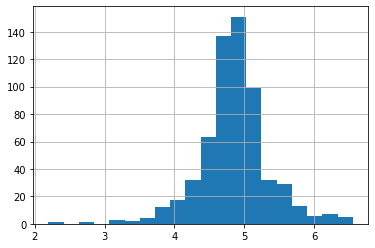

In [43]:
#log transformation
train['LoanAmount_Log'] = np.log(train['LoanAmount'])
test['LoanAmount_Log'] = np.log(test['LoanAmount'])

train['LoanAmount_Log'].hist(bins = 20)

The distribution has now been normalized and the effect of extreme values has been significantly subsided. 

**Prediction Modelling**

Some of the factors to consider during model evaluation performance. 
1. Precision: The measure of correctness achieved in true prediction.- TP/(TP+FP)
2. Recall/Sensitivty: Measure of actual predictions that were correctly predicted. The number of obdervations of the true class labelled correctly- TP/(TP+TN)
3. Specificity: It is a measure of how many observations of false class are measured correctly.- TN/(TN+FP).

Specificity and Sensitivity plays a crucial role deriving the ROC curve.

Receiver Operating Characteristic(ROC) summarizes the model's performance by evaluating the trade offs between true positive(sensitivity) and false positive rate(1-specificity)

The area under curve(AUC), referred to as index of accuracy(A) or concordance index is a perfect performance metric for ROC curve. Higher the area under curve, the better the prediction power of the model.

More details: https://courses.analyticsvidhya.com/courses/take/loan-prediction-practice-problem-using-python/texts/6119654-evaluation-metrics-for-classification-problems


**Model 1: Logistic Regression**

In [44]:
# dropping the LOAN_ID variable as it does not have any effect on the loan status
train = train.drop('Loan_ID',axis = 1)
test = test.drop('Loan_ID',axis = 1)

In [45]:
# dropping the target variable from the training dataset
X = train.drop('Loan_Status',axis = 1)
y = train.Loan_Status

In [46]:
#making dummy variables for the categorical variables
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [47]:
# splitting the dataset - train & validation
from sklearn.model_selection import train_test_split

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.3)

In [48]:
#training - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [49]:
# predictions
pred_cv = model.predict(X_cv)

In [50]:
#getting the accuracy score
accuracy_score(y_cv,pred_cv)

0.7837837837837838

The predictions are 85% accurate. The model has identified 85% of the loan status accurately.

In [51]:
#predictions for the test data
pred_test = model.predict(test)

For the final submission we only need the Loan_ID and the corresponding Loan_Status for the final submission. 

In [52]:
#importing the submission file
submission = pd.read_csv('Datasets/sample_submission_49d68Cx.csv')

In [53]:
# Function for creating submission file
def submission_file(name,pred_test):
    #Scoring/Testing the Model on the leaderboard
    # Filling the Loan_ID of the test dataset
    submission['Loan_Status'] = pred_test
    submission['Loan_ID'] = test_original['Loan_ID']

    # changing the submission format
    submission['Loan_Status'].replace(0,'N',inplace = True)
    submission['Loan_Status'].replace(1,'Y',inplace = True)

    #converting the submission dataframe to csv to check accuracy on the leaderboard
    pd.DataFrame(submission,columns = ['Loan_ID','Loan_Status']).to_csv(name,index = False)


In [89]:
#saving file
submission_file('Submissions\logistic_Regression1.csv',pred_test)

From this submission we have an accuracy of 0.778.

Instead of creating validation set, we can make use of cross validaton to validate our predictions.

**Cross Validation**

Using stratified k-fold cross validation. Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. It is generally a better approach when dealing with bias and variance.

In [55]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 5, random_state = 1,shuffle=True)
i = 1
MVD = 0 #Mean Validation Score
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    MVD += score
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    
print('The Mean Validation Accuracy is {}'.format(MVD/5))



1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147
The Mean Validation Accuracy is 0.8012928162068507


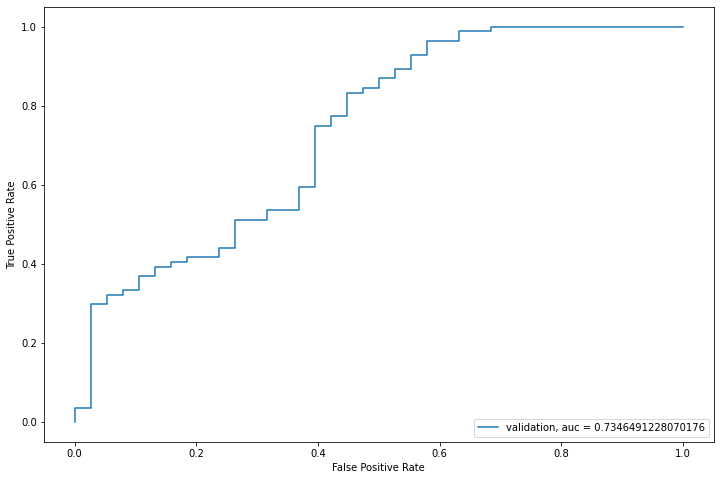

In [56]:
# visualizing the ROC curve
from sklearn import metrics 
fpr,tpr,_ = metrics.roc_curve(yvl,pred) 
auc = metrics.roc_auc_score(yvl,pred)

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr,label = "validation, auc = "+str(auc))

#xlabel
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()

The auc or area under curve is 0.73 


In [88]:
#saving file
submission_file('Submissions\logistic_Regression2.csv',pred_test)


This has submission has an accuracy of 0.764, It is lower than the previous submission.

**Feature Engineering**

Based on the domain knowledge, we can come up with new features that might affect the target variable. The following features can be created:
1. Total Income: Combining the applicant and co-applicant income
2. EMI : This is the monthly amount to be paid by the applicant. People with high EMI's find it harder to pay back their loans.
3. Balance Income: This is the income left after the EMI has been paid

In [58]:
#total income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income'>

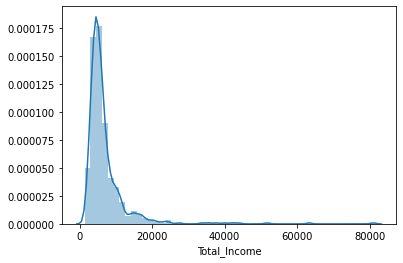

In [59]:
# checking the distribution of Total Income
sns.distplot(train['Total_Income'])

The plot is shifted to the left showing that the distribution is right skewed. Taking the log transformation to make the distribution normal.

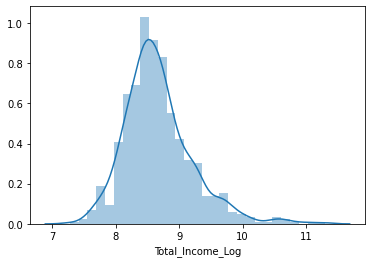

In [60]:
train['Total_Income_Log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_Log']);
test['Total_Income_Log'] = np.log(test['Total_Income'])

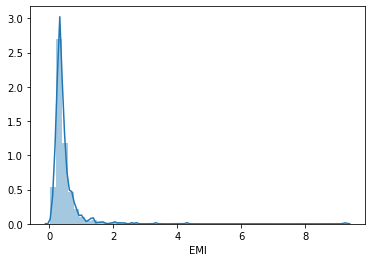

In [61]:
#EMI
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI']);

In [62]:
#Balance Feature
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

In [63]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_Log,EMI,Balance Income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [64]:
#dropping the variables which were used to create the above features
train = train.drop(['Total_Income','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis = 1)

In [65]:
#dropping the variables which were used to create the above features
test = test.drop(['Total_Income','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis = 1)

**Model Building: Part 2**

After creating new features, we can continue the model building process.

In [66]:
#preparing the data to feed to the models
X = train.drop('Loan_Status',1)


**Logistic Regression**

In [67]:
i = 1
MVD = 0 #Mean Validation Score
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    MVD += score
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    
print('The Mean Validation Accuracy is {}'.format(MVD/5))


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393
The Mean Validation Accuracy is 0.7964014394242304


This model has a Mean Validation Accuracy of 0.79 which is lower than the accuracy achieved before feature engineering.

In [87]:
#saving file
submission_file('Submissions\logistic_Regression3.csv',pred_test)

Submission has an accuracy of 0.785.

**Decision Tree**

In [69]:
from sklearn import tree
i = 1
MVD = 0 #Mean Validation Score
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    
    #Building the Model
    model = tree.DecisionTreeClassifier(random_state = 1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    MVD += score
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    
print('The Mean Validation Accuracy is {}'.format(MVD/5))



1 of kfold 5
accuracy_score 0.7235772357723578

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.7317073170731707

5 of kfold 5
accuracy_score 0.680327868852459
The Mean Validation Accuracy is 0.7198054111688659


The Mean Validation Accuracy is lower than the model built using Logistic Regression. 

**Random Forest**

Random Forest is a tree based bootstrapping algorithm where a certain number of weak learners(decision trees) are combined to make a powerful prediction model.

In [70]:
from sklearn.ensemble import RandomForestClassifier
i = 1
MVD = 0 #Mean Validation Score
kf = StratifiedKFold(n_splits = 5, random_state = 1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    
    #Building the Model
    model = RandomForestClassifier(random_state = 1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    MVD += score
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    
print('The Mean Validation Accuracy is {}'.format(MVD/5))



1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8048780487804879

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377
The Mean Validation Accuracy is 0.7996001599360256


In [86]:
submission_file('Submissions\RFModel1.csv',pred_test)

The mean validation accuracy for the Random Forest model is 0.7996. The highest so far.However, this model scores 0.757 on the Leaderboard.

**Random Forest: HyperParameter Tuning**

We will try to improve the accuracy of the Random Forest Model by tuning the hyperparameters using Grid_search

In [75]:
from sklearn.model_selection import GridSearchCV

#parameters
param_grid = {'max_depth':list(range(1,20,2)), 'n_estimators':list(range(1,200,20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state = 1),param_grid)

from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.3,random_state = 1)

#fitting the grid search model
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [76]:
#Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=41, random_state=1)

Therefore the optimized value fo max_depth is 7 and n_estimators = 41

In [77]:
#Buiulding model using optimized parameters
i = 1
MVD = 0 #Mean Validation Score
kf = StratifiedKFold(n_splits = 5, random_state = 1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    
    #Building the Model
    model = RandomForestClassifier(random_state = 1,max_depth=7, n_estimators =41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    MVD += score
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    
print('The Mean Validation Accuracy is {}'.format(MVD/5))


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147
The Mean Validation Accuracy is 0.8061708649873385


In [85]:
submission_file('Submissions\RFModel2.csv',pred_test)

The tuned model has an accuracy of 0.806 while on the leaderboard the accuracy is 0.785

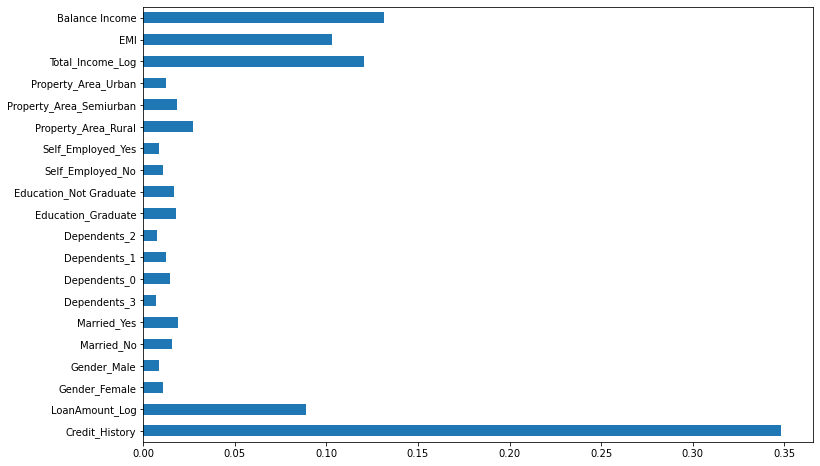

In [80]:
# Finding out the feature importance: The featyres which were most importtant in building the model
importances = pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind = 'barh',figsize=(12,8));

We can infer from the above plot that credit history is the most important feature followed by Balance Income, EMI, therefore we can conclude that feature engineering helped in predicting the target variable better.

**XGBoost**

Extreme Gradient Boosting is a fast and efficient algorithm.

In [81]:
#building XGBoost Model
from xgboost import XGBClassifier
i = 1
MVD = 0 #Mean Validation Score
kf = StratifiedKFold(n_splits = 5, random_state = 1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    
    #Building the Model
    model =XGBClassifier(random_state = 1,max_depth=4, n_estimators =50)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    MVD += score
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    
print('The Mean Validation Accuracy is {}'.format(MVD/5))


1 of kfold 5
accuracy_score 0.7804878048780488

2 of kfold 5
accuracy_score 0.7886178861788617

3 of kfold 5
accuracy_score 0.7642276422764228

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7622950819672131
The Mean Validation Accuracy is 0.7752232440357191


In [84]:
submission_file('Submissions\XGBModel.csv',pred_test)

The Mean Validation Accuracy for the Model is 0.775 while its accuracy on the Leaderboard is 0.771

**Conclusion**

After trying out different models, the model with the highest accuracy on the Leaderboard is Logistic Regression & Random Forest Model with an accuracy of 0.7847. 

Some of the steps that can be taken to further Improve the Model are:
1. Training the XGBoost model using grid search to optmimize its hyperparameters and improve its accuracy.
2. Combining applicants qith 1,2,3 or more dependents to create a new feature.
3. Arriving at EMI using better formula which may include interest rates.
4. Using ensemble modelling- combining different models.

**Acknowlegements:** Analytics Vidhvya
https://courses.analyticsvidhya.com/courses/take/loan-prediction-practice-problem-using-python/texts/6119358-problem-statement